# Resuspension forcing

Based on tidal speeds from Jacqui-Lee

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import scipy.io

%matplotlib notebook

###### Parameters:

In [5]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

###### Load files:

In [6]:
mesh       = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

cond2      = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond2, mesh_bathy)

Resuspension forcing file

In [7]:
resus   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/erosion_rate-20200323.nc')
r_lons  = np.array(resus.variables['nav_lon'])
r_lats  = np.array(resus.variables['nav_lat'])
erosion = np.array(resus.variables['er_rate'])

##### Figures:

In [8]:
log_erosion_rate = np.log10(erosion)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


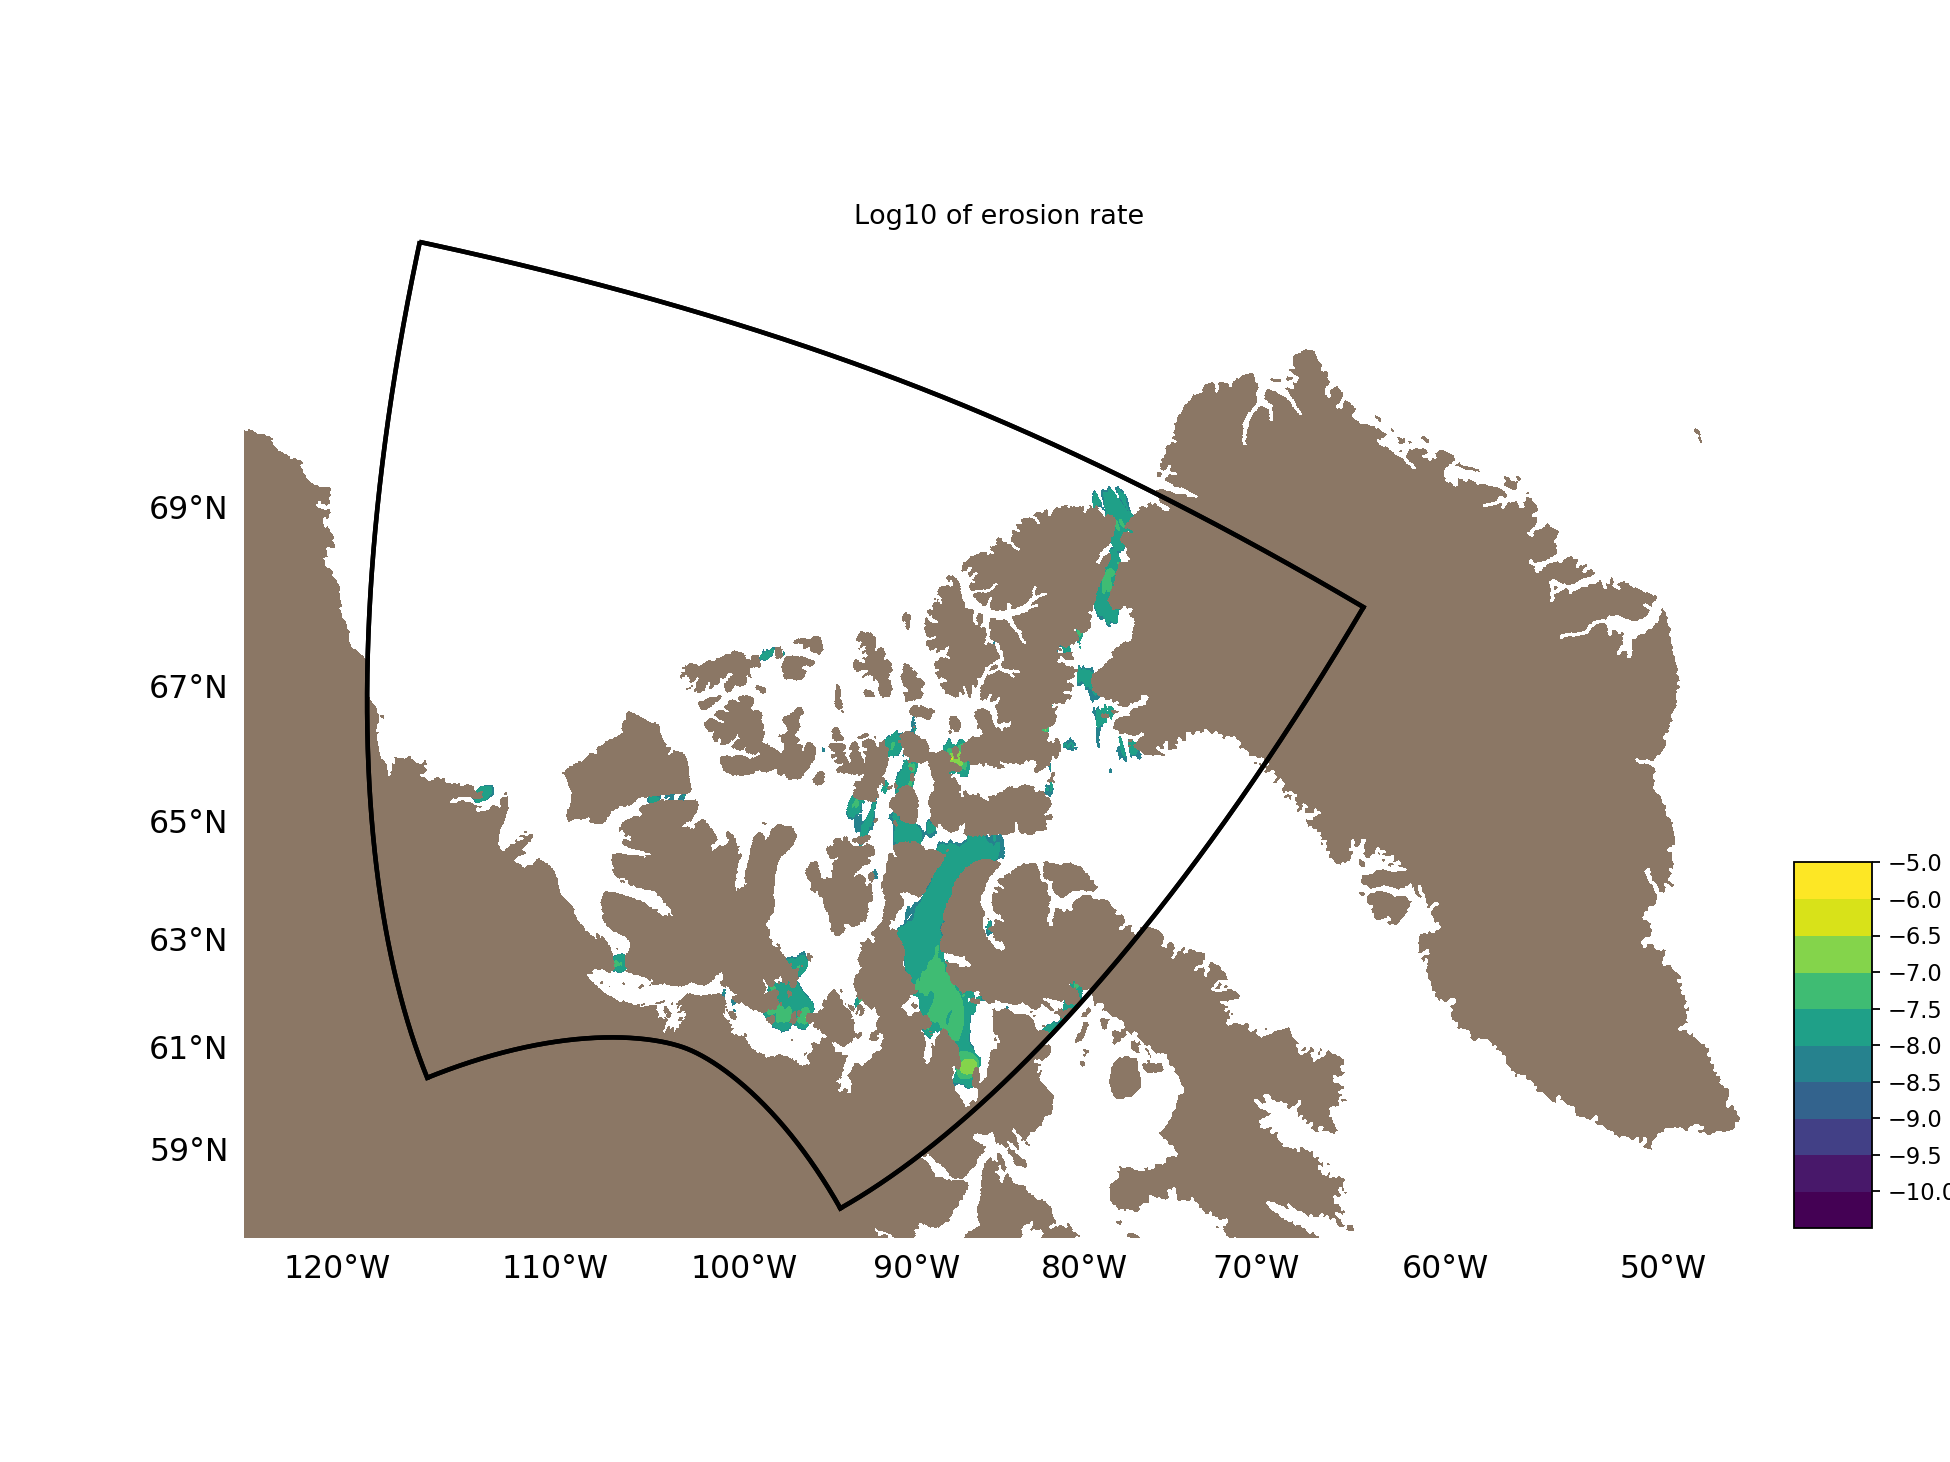

In [10]:
fig, ax1, proj1= pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))
# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(mesh_lon, mesh_lat) 
proj1.plot(x_sub[imin:imax,jmax],   y_sub[imin:imax,jmax]  , 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmin],   y_sub[imin:imax,jmin]  , 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin,jmin:jmax],   y_sub[imin,jmin:jmax]  , 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imin,jmin:jmax].T, y_sub[imin,jmin:jmax].T, 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imax,jmin:jmax],   y_sub[imax,jmin:jmax]  , 'k-', lw=2.0, zorder=5)
proj1.plot(x_sub[imax,jmin:jmax].T, y_sub[imax,jmin:jmax].T, 'k-', lw=2.0, zorder=5)

# erosion rate:  ---------------------------------------------------------------------------
CB = proj1.contourf(x_sub[imin:imax,jmin:jmax], y_sub[imin:imax,jmin:jmax], log_erosion_rate[imin:imax,jmin:jmax],\
                    vmin=-10, vmax=-6, levels=[-14, -10, -9.5, -9, -8.5, -8, -7.5, -7, -6.5, -6, -5])

ax1.set_title('Log10 of erosion rate')

cbaxes = fig.add_axes([0.92, 0.16, 0.04, 0.25])
CBar = plt.colorbar(CB, cax=cbaxes, ticks=[-10, -9.5, -9, -8.5, -8, -7.5, -7, -6.5, -6, -5])
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/sub-domain.png', bbox_inches='tight')